In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from scipy import stats
import sklearn.metrics as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

Import Dataset:

In [3]:
item_set = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
item_category_set = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
train_set = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
shop_set = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
test_set = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")

In [4]:
# item set
item_set.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
item_set.shape

(22170, 3)

In [6]:
item_set["item_name"].nunique()

22170

In [7]:
#item category set
item_category_set.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
item_category_set.shape

(84, 2)

In [9]:
item_category_set['item_category_name'].nunique()

84

In [10]:
#shop set
shop_set.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
shop_set.shape

(60, 2)

In [12]:
shop_set['shop_name'].nunique()

60

In [13]:
#train set
train_set.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [14]:
item_price = train_set['item_price']
item_price.sort_values( ascending=False)

1163158    307980.0000
885138      59200.0000
1488135     50999.0000
2327159     49782.0000
2931380     42990.0000
              ...     
673155          0.0900
611400          0.0875
579766          0.0700
608763          0.0700
484683         -1.0000
Name: item_price, Length: 2935849, dtype: float64

In [15]:
train_set.shape

(2935849, 6)

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [17]:
train_set.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Check null values:

In [18]:
train_set.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Data Visualization:

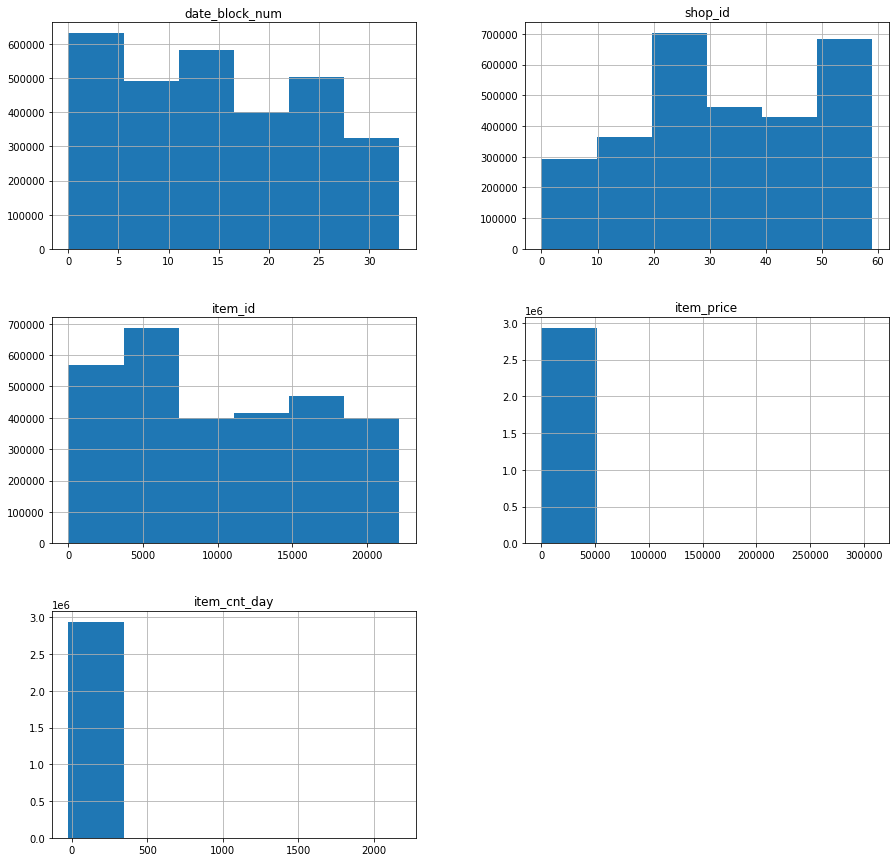

In [19]:
train_set.hist(figsize=(15,15), bins=6)
plt.show()

Item Price:

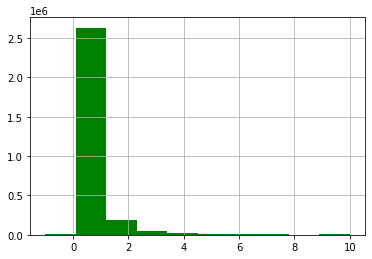

In [20]:
train_set['item_cnt_day'].hist(range=[-1, 10], facecolor='green', align='mid')
plt.show()

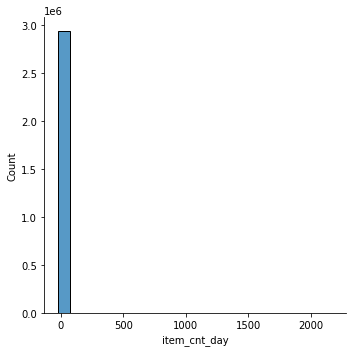

In [21]:
sns.displot(train_set['item_cnt_day'])

In [22]:
train_set['item_cnt_day'].describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [23]:
correlation_matrix = train_set.corr()
correlation_matrix['item_cnt_day'].sort_values(ascending = False)

item_cnt_day      1.000000
item_id           0.016650
item_price        0.011197
date_block_num    0.009402
shop_id          -0.005230
Name: item_cnt_day, dtype: float64

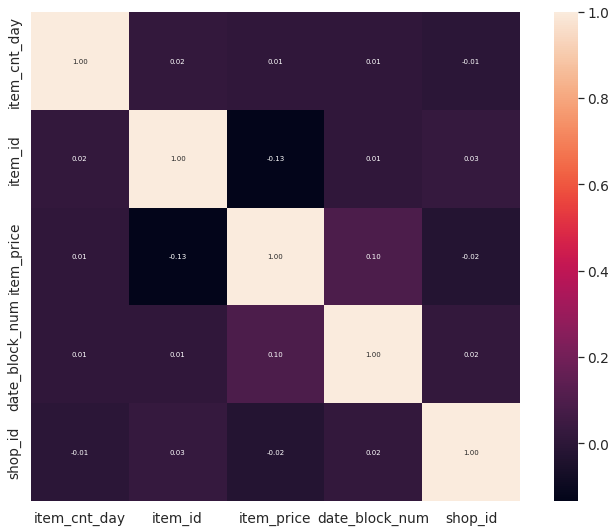

In [24]:
correlation_num = 6
correlation_cols = correlation_matrix.nlargest(correlation_num,'item_cnt_day')['item_cnt_day'].index
correlation_mat_sales = np.corrcoef(train_set[correlation_cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(correlation_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=correlation_cols.values, xticklabels=correlation_cols.values)
plt.show()

In [25]:
train_set = train_set.drop(columns=['date','date_block_num','item_price'])

In [26]:
train_set.head()

,shop_id,item_id,item_cnt_day
0,59,22154,1.0
1,25,2552,1.0
2,25,2552,-1.0
3,25,2554,1.0
4,25,2555,1.0


In [27]:
y= train_set['item_cnt_day']
x= train_set.drop(columns=['item_cnt_day'])
print(len(x.columns))

2


Split Dataset:

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state = 60,shuffle=True)
print(len(X_train))
print(len(X_test))

2055094
880755


**Train model with train data**

Linear Regression:

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

#make predictions using linear regression
price_predict =(linear_model.predict(X_test))

#Measure Performance 
linear_mse = mean_squared_error(Y_test,price_predict)
print("Mean Squared error: ",linear_mse)
linear_SqMse = np.sqrt(linear_mse)
print("Root Mean Squared error: ", linear_SqMse)

print("Explain variance score for Linear Regression =", round(sm.explained_variance_score(Y_test,price_predict),2)) 
print("R2 score for Linear Regression =", round(sm.r2_score(Y_test, price_predict), 2))

Mean Squared error:  5.693137123163132
Root Mean Squared error:  2.3860295729858696
Explain variance score for Linear Regression = 0.0
R2 score for Linear Regression = 0.0


In [30]:
lasso_model= Lasso(max_iter=5000)

# Train the model with training data
lasso_model.fit(X_train,Y_train)
#make predictions 
price_predict =(lasso_model.predict(X_test))


lasso_mse = mean_squared_error(Y_test,price_predict)
print("Mean Squared Error : " , lasso_mse)
lasso_SqMse = np.sqrt(lasso_mse)
print("Root Mean Squared error: ", lasso_SqMse)

print("Explain variance score for Lasso Regression =", round(sm.explained_variance_score(Y_test,price_predict), 2)) 
print("R2 score for Lasso Regression =", round(sm.r2_score(Y_test, price_predict), 2))

Mean Squared Error :  5.693228621709094
Root Mean Squared error:  2.386048746716859
Explain variance score for Lasso Regression = 0.0
R2 score for Lasso Regression = 0.0


In [31]:
# Create a model with 50 decision trees
forest_model= RandomForestRegressor(n_estimators = 50, random_state = 42)

# Train the model with training data
forest_model.fit(X_train,Y_train)
#make predictions using random forest model
price_predict =(forest_model.predict(X_test))


forest_mse = mean_squared_error(Y_test,price_predict)
print("Mean Squared Error : " , forest_mse)
forest_SqMse = np.sqrt(forest_mse)
print("Root Mean Squared error: ", forest_SqMse)

print("Explain variance score for Random Forest Regression =", round(sm.explained_variance_score(Y_test,price_predict), 2)) 
print("R2 score for Random Forest Regression =", round(sm.r2_score(Y_test, price_predict), 2))

Mean Squared Error :  4.10154338231663
Root Mean Squared error:  2.0252267483708164
Explain variance score for Random Forest Regression = 0.28
R2 score for Random Forest Regression = 0.28


In [32]:
# Create a model with 50 decision trees
xgbr=  XGBRegressor()

# Train the model with training data
xgbr.fit(X_train,Y_train)
#make predictions using random forest model
price_predict =(xgbr.predict(X_test))


xgbr_mse = mean_squared_error(Y_test,price_predict)
print("Mean Squared Error : " , xgbr_mse)
xgbr_SqMse = np.sqrt(xgbr_mse)
print("Root Mean Squared error: ", xgbr_SqMse)

print("Explain variance score for XGB Regression =", round(sm.explained_variance_score(Y_test,price_predict), 2)) 
print("R2 score for XGB Regression =", round(sm.r2_score(Y_test, price_predict), 2))

Mean Squared Error :  4.213609376497523
Root Mean Squared error:  2.0527078156663023
Explain variance score for XGB Regression = 0.26
R2 score for XGB Regression = 0.26


**Test set**

In [33]:
test_set.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [34]:
test_id = test_set['ID']
test_x= test_set.drop(columns=['ID'])
print(len(test_x.columns))

2


In [35]:
y_prdict = forest_model.predict(test_x)

In [36]:
submission = pd.DataFrame(list(zip(test_id, y_prdict)),
               columns =['ID', 'item_cnt_month'])
submission.head(20)

,ID,item_cnt_month
0,0,1.000000
1,1,1.430435
2,2,1.117140
3,3,1.009859
4,4,1.002222
5,5,1.000000
6,6,1.047075
7,7,1.000000
8,8,1.430435
9,9,1.057667


In [37]:
submission.to_csv('submission.csv', index=False)